In [3]:
import numpy as np

In [4]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [7]:
def sin(x, T=100):
    return np.sin(2.0*np.pi*x/T)

def toy_problem(T=100, ampl=0.05):
    x = np.arange(0, 2*T+1)
    noise = ampl * np.random.uniform(low=1.0, high=1.0, size=len(x))
    return sin(x) + noise

In [8]:
f = toy_problem()

In [10]:
f.shape

(201,)

In [40]:
def make_dataset(low_data, maxlen=25):
    data, target = [], []
    
    for i in range(len(low_data)-maxlen):
        data.append(low_data[i:i + maxlen])
        target.append(low_data[i + maxlen])
        
    re_data = np.array(data).reshape(len(data), maxlen, 1)
    re_target = np.array(target).reshape(len(data), 1)
    
    return re_data, re_target

In [41]:
g, h = make_dataset(f)

In [42]:
g.shape, h.shape

((176, 25, 1), (176, 1))

In [43]:
g.shape

(176, 25, 1)

In [38]:
g[0].shape

(26, 1)

In [39]:
pd.DataFrame(g[:,:,0]).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.050000,0.112791,0.175333,0.237381,0.298690,0.359017,0.418125,0.475779,0.531754,0.585827,0.637785,0.687424,0.734547,0.778969,0.820513,0.859017,0.894328,0.926307,0.954827,0.979776,1.001057,1.018583,1.032287,1.042115,1.048027,1.050000
1,0.112791,0.175333,0.237381,0.298690,0.359017,0.418125,0.475779,0.531754,0.585827,0.637785,0.687424,0.734547,0.778969,0.820513,0.859017,0.894328,0.926307,0.954827,0.979776,1.001057,1.018583,1.032287,1.042115,1.048027,1.050000,1.048027
2,0.175333,0.237381,0.298690,0.359017,0.418125,0.475779,0.531754,0.585827,0.637785,0.687424,0.734547,0.778969,0.820513,0.859017,0.894328,0.926307,0.954827,0.979776,1.001057,1.018583,1.032287,1.042115,1.048027,1.050000,1.048027,1.042115
3,0.237381,0.298690,0.359017,0.418125,0.475779,0.531754,0.585827,0.637785,0.687424,0.734547,0.778969,0.820513,0.859017,0.894328,0.926307,0.954827,0.979776,1.001057,1.018583,1.032287,1.042115,1.048027,1.050000,1.048027,1.042115,1.032287
4,0.298690,0.359017,0.418125,0.475779,0.531754,0.585827,0.637785,0.687424,0.734547,0.778969,0.820513,0.859017,0.894328,0.926307,0.954827,0.979776,1.001057,1.018583,1.032287,1.042115,1.048027,1.050000,1.048027,1.042115,1.032287,1.018583


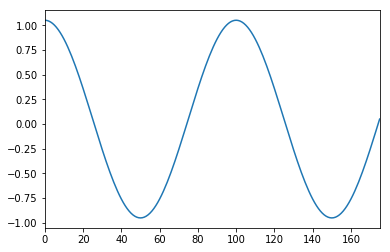

In [74]:
pd.Series(h[:,0]).plot()

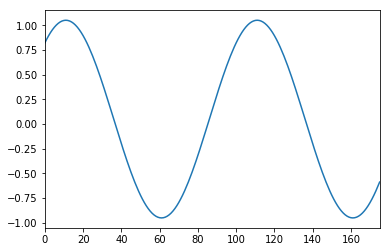

In [75]:
i = np.random.choice(range(25))
pd.Series(g[:, i, 0]).plot()

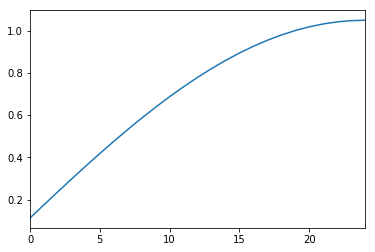

In [76]:
i = np.random.choice(range(165))
pd.Series(g[1, :, 0]).plot()

### Construct model

In [81]:
length_of_sequence = g.shape[1]
in_out_neurons = 1
n_hidden = 300

model = Sequential()
model.add(LSTM(n_hidden, batch_input_shape=(None, length_of_sequence, in_out_neurons)))
model.add(Dense(in_out_neurons))
model.add(Activation('linear'))
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))

In [82]:
# learn

early_stopping = EarlyStopping(monitor='val_loss', mode='auto', patience=20)

model.fit(g, h, 
         batch_size=300,
         epochs=100,
         validation_split=0.1,
         callbacks=[early_stopping])

Instructions for updating:
Use tf.cast instead.
Train on 158 samples, validate on 18 samples
Epoch 1/100
158/158 [==============================] - 3s 18ms/step - loss: 0.4837 - val_loss: 0.1642
Epoch 2/100
158/158 [==============================] - 0s 2ms/step - loss: 0.3685 - val_loss: 0.0905
Epoch 3/100
158/158 [==============================] - 0s 2ms/step - loss: 0.2551 - val_loss: 0.0393
Epoch 4/100
158/158 [==============================] - 0s 2ms/step - loss: 0.1587 - val_loss: 0.0362
Epoch 5/100
158/158 [==============================] - 0s 2ms/step - loss: 0.1038 - val_loss: 0.1007
Epoch 6/100
158/158 [==============================] - 0s 2ms/step - loss: 0.1095 - val_loss: 0.1169
Epoch 7/100
158/158 [==============================] - 0s 2ms/step - loss: 0.0819 - val_loss: 0.0833
Epoch 8/100
158/158 [==============================] - 0s 2ms/step - loss: 0.0485 - val_loss: 0.0474
Epoch 9/100
158/158 [==============================] - 0s 2ms/step - loss: 0.0364 - val_loss: 0.02

In [83]:
# predict
predicted = model.predict(g)

In [85]:
import matplotlib.pyplot as plt

In [86]:
plt.figure()
plt.plot()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

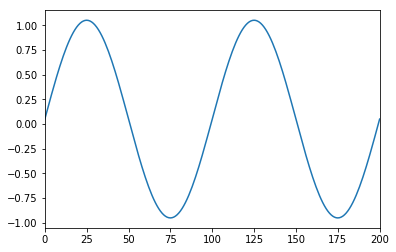

In [89]:
pd.Series(f).plot()

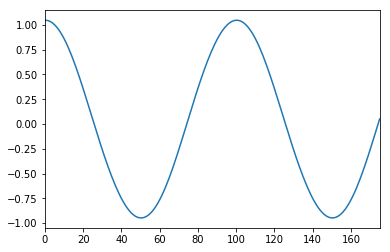

In [94]:
pd.Series(predicted[:, 0]).plot()

参考にする
https://qiita.com/tizuo/items/b9af70e8cdc7fb69397f